In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('bike_sales_100k.csv')

In [3]:
df

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender
0,1,11-07-2022,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,Female
1,2,03-05-2024,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,Male
2,3,01-09-2022,2689,Folding Bike,4247.99,3,San Antonio,338,PayPal,59,Female
3,4,28-09-2022,3797,Mountain Bike,1722.01,3,San Antonio,352,Apple Pay,19,Male
4,5,05-01-2021,1633,BMX,3941.44,3,Philadelphia,580,PayPal,67,Female
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,16-06-2022,7584,Hybrid Bike,3088.13,2,Philadelphia,116,PayPal,60,Female
99996,99997,09-12-2023,9076,Road Bike,1051.44,2,Phoenix,153,Credit Card,67,Female
99997,99998,14-02-2020,3944,Folding Bike,2783.79,4,Phoenix,124,Google Pay,37,Female
99998,99999,13-12-2023,3334,Hybrid Bike,4265.42,4,Philadelphia,610,Credit Card,57,Male


In [4]:
df.shape

(100000, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_ID          100000 non-null  int64  
 1   Date             100000 non-null  object 
 2   Customer_ID      100000 non-null  int64  
 3   Bike_Model       100000 non-null  object 
 4   Price            100000 non-null  float64
 5   Quantity         100000 non-null  int64  
 6   Store_Location   100000 non-null  object 
 7   Salesperson_ID   100000 non-null  int64  
 8   Payment_Method   100000 non-null  object 
 9   Customer_Age     100000 non-null  int64  
 10  Customer_Gender  100000 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 8.4+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe(include = object)

,Date,Bike_Model,Store_Location,Payment_Method,Customer_Gender
count,100000,100000,100000,100000,100000
unique,1727,7,7,6,2
top,29-01-2022,BMX,New York,Apple Pay,Female
freq,81,14377,14515,16751,50227


In [8]:
sns.set_style("whitegrid")
sns.set_palette("RdBu")

<ipython-input-9-b764a3a2ffc4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x="Store_Location", data=df, order=df_count.index, palette=color_mapping)
<ipython-input-9-b764a3a2ffc4>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels(graph.get_xticklabels(), rotation = 45, horizontalalignment = 'right')


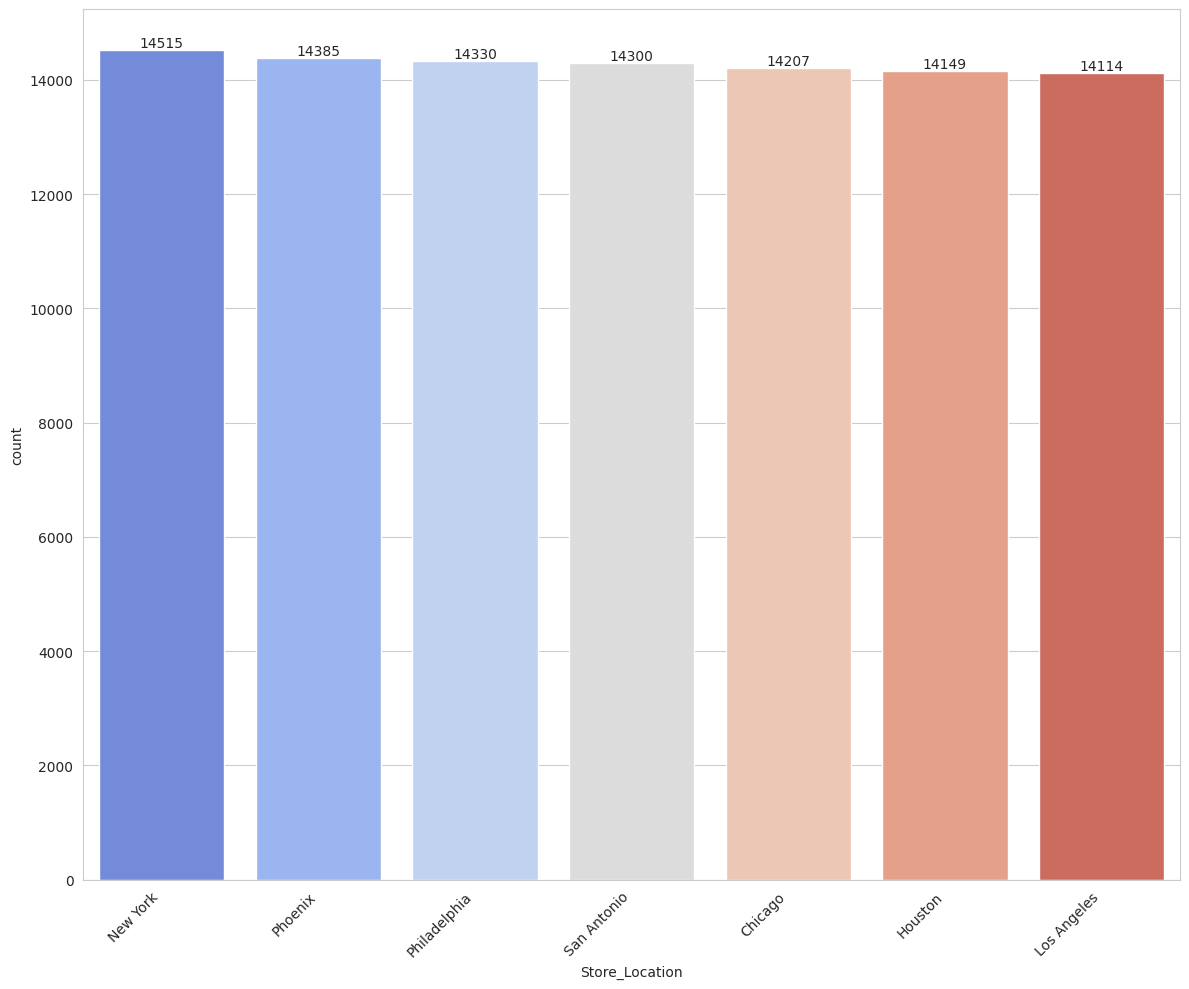

In [9]:
# Menghitung nilai count dari setiap store location
df_count = df['Store_Location'].value_counts()
palette = sns.color_palette("coolwarm", len(df_count))
color_mapping = {Store_Location: color for Store_Location, color in zip(df_count.index, palette)}

plt.figure(figsize=(12,10))

graph = sns.countplot(x="Store_Location", data=df, order=df_count.index, palette=color_mapping)

graph.set_xticklabels(graph.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

for container in graph.containers:
    graph.bar_label(container)


plt.tight_layout()
plt.show()

In [10]:
df['Date']

,Date
0,11-07-2022
1,03-05-2024
2,01-09-2022
3,28-09-2022
4,05-01-2021
...,...
99995,16-06-2022
99996,09-12-2023
99997,14-02-2020
99998,13-12-2023


In [11]:
df['Date'].unique()

array(['11-07-2022', '03-05-2024', '01-09-2022', ..., '09-01-2023',
       '04-04-2020', '17-06-2020'], dtype=object)

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce' )
df['Date']

,Date
0,2022-07-11
1,2024-05-03
2,2022-09-01
3,2022-09-28
4,2021-01-05
...,...
99995,2022-06-16
99996,2023-12-09
99997,2020-02-14
99998,2023-12-13


In [13]:
#extract month
df['Month'] = df['Date'].dt.month
df['Month']

,Month
0,7
1,5
2,9
3,9
4,1
...,...
99995,6
99996,12
99997,2
99998,12


In [14]:
#extract year
df['Year'] = df['Date'].dt.year
df['Year']

,Year
0,2022
1,2024
2,2022
3,2022
4,2021
...,...
99995,2022
99996,2023
99997,2020
99998,2023


In [15]:
df['Day'] = df['Date'].dt.day
df['Day']

,Day
0,11
1,3
2,1
3,28
4,5
...,...
99995,16
99996,9
99997,14
99998,13


In [16]:
# season column

def find_season(monthNumber):
  if monthNumber in [12 , 1, 2]:
    return 'Winter'
  elif monthNumber in [3, 4, 5]:
    return 'Spring'
  elif monthNumber in [6, 7, 8]:
    return 'Summer'
  elif monthNumber in [9, 10 , 11]:
    return 'Autumn'

df['Season'] = df['Month'].apply(find_season)
df['Season']

,Season
0,Summer
1,Spring
2,Autumn
3,Autumn
4,Winter
...,...
99995,Summer
99996,Winter
99997,Winter
99998,Winter


In [17]:
df['Month'] = pd.to_datetime(df['Month'], format = '%m').dt.month_name()

In [18]:
df['Month']

,Month
0,July
1,May
2,September
3,September
4,January
...,...
99995,June
99996,December
99997,February
99998,December


In [19]:
# Convert some column datatype

df['Day'] = df['Day'].astype('category')

df['Season'] = df['Season'].astype('category')

df['Year'] = df['Year'].astype('category')

<ipython-input-21-75a568effd6f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="Season", col = "Year", data = df, kind = "count", palette = color_mapping, legend = False)


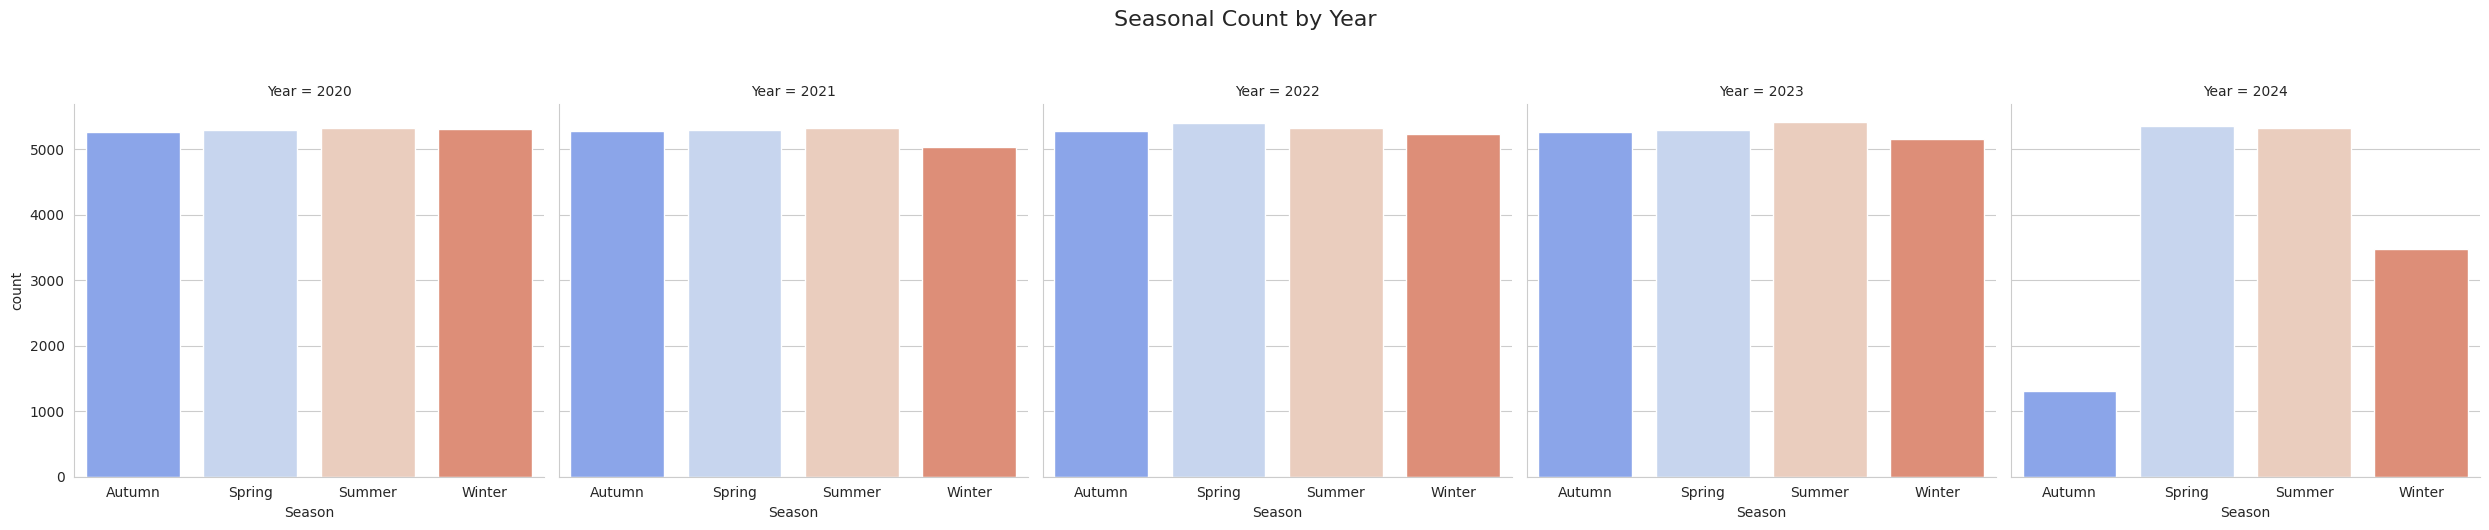

In [21]:
#Menghitung jumlah count dari setiap season
count_data = df['Season'].value_counts().sort_index()
palette = sns.color_palette("coolwarm",len(count_data))
color_mapping = {season: color for season, color in zip(count_data.index, palette)}

#Fungsi untuk menerapkan warna pada tiap bar berdasarkan jumlah ocunt
def apply_olors (ax, **kwargs):
  for patcch in ax.patches:
    season = path.get_x() + patch.get_width() / 2
    for season_name, color in olor_mapping.items():
      if season_name == patch.get_x():
        patch.set_facecolor(color)


#plot
g = sns.catplot(x="Season", col = "Year", data = df, kind = "count", palette = color_mapping, legend = False)
g.set_axis_labels("Season","count")
g.fig.suptitle("Seasonal Count by Year", y = 1.05, fontsize = 16)

#Terapkan warna pada tiap subplot
for ax in g.axes.flat:
  apply_colors(ax)

plt.tight_layout()
plt.show()

# **Discover Store_Location Column**

In [22]:
df['Store_Location'].unique()

array(['Philadelphia', 'Chicago', 'San Antonio', 'Los Angeles', 'Houston',
       'New York', 'Phoenix'], dtype=object)

<ipython-input-23-ec81be97facf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Store_Location', y='Count', data=count_data, palette=palette)


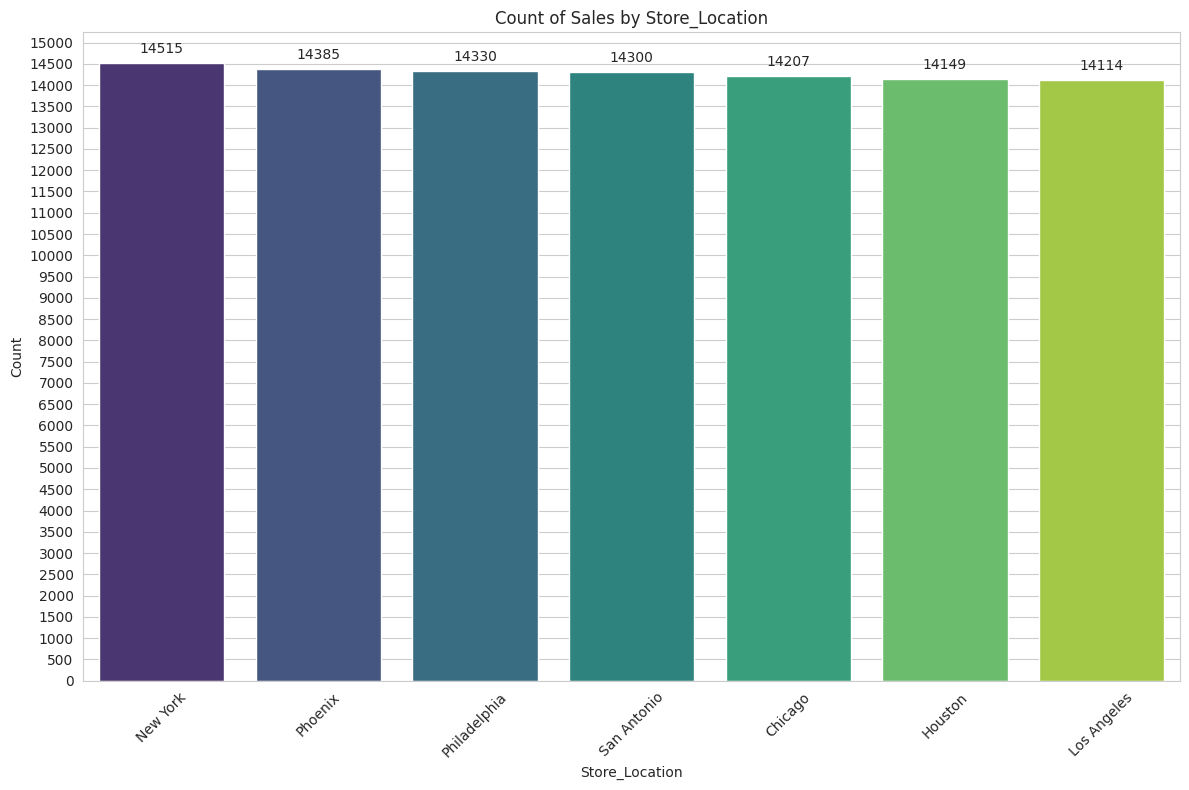

In [23]:
# Menghitung jumlah data untuk setiap region
count_data = df['Store_Location'].value_counts().reset_index()
count_data.columns = ['Store_Location', 'Count']

# Menggunakan palette viridis
palette = sns.color_palette("viridis", len(count_data))

# Plot dengan barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Store_Location', y='Count', data=count_data, palette=palette)

# Menambahkan label jumlah data di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

# Menambahkan label untuk sumbu
plt.xticks(rotation=45)
plt.xlabel('Store_Location')
plt.ylabel('Count')
plt.title('Count of Sales by Store_Location')

# Mengatur ticks pada sumbu y dengan kelipatan 500
y_max = count_data['Count'].max()
y_ticks = np.arange(0, y_max + 500, 500)
plt.yticks(y_ticks, labels=[f'{int(y_tick)}' for y_tick in y_ticks])

plt.tight_layout()
plt.show()

Discover Bike_Model column

In [24]:
print(df['Bike_Model'].nunique())

7


In [25]:
print(df['Bike_Model'].unique())

['Cruiser' 'Hybrid Bike' 'Folding Bike' 'Mountain Bike' 'BMX' 'Road Bike'
 'Electric Bike']


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Sale_ID          100000 non-null  int64         
 1   Date             100000 non-null  datetime64[ns]
 2   Customer_ID      100000 non-null  int64         
 3   Bike_Model       100000 non-null  object        
 4   Price            100000 non-null  float64       
 5   Quantity         100000 non-null  int64         
 6   Store_Location   100000 non-null  object        
 7   Salesperson_ID   100000 non-null  int64         
 8   Payment_Method   100000 non-null  object        
 9   Customer_Age     100000 non-null  int64         
 10  Customer_Gender  100000 non-null  object        
 11  Month            100000 non-null  object        
 12  Year             100000 non-null  category      
 13  Day              100000 non-null  category      
 14  Season           1000

<ipython-input-27-fecae30fd56b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(y="Bike_Model", data=df, order=count_data.index, palette=[color_mapping[x] for x in count_data.index])


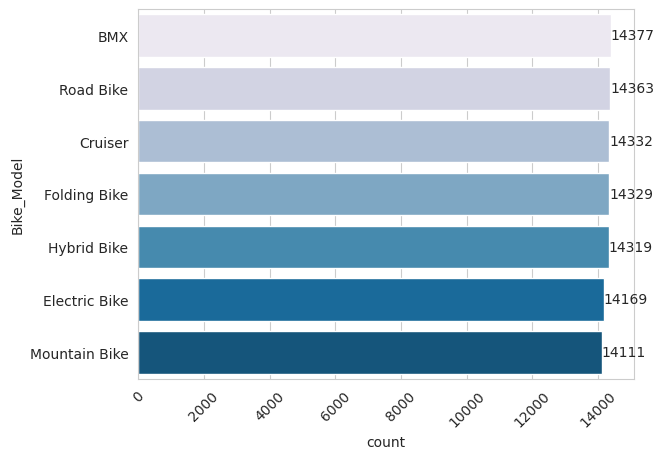

In [27]:
count_data = df['Bike_Model'].value_counts().iloc[:20]
palette = sns.color_palette("PuBu", len(count_data))
color_mapping = {product: color for product, color in zip(count_data.index, palette)}
graph = sns.countplot(y="Bike_Model", data=df, order=count_data.index, palette=[color_mapping[x] for x in count_data.index])

for container in graph.containers:
    graph.bar_label(container)

plt.xticks(rotation=45)
plt.show()

# **Discover Payment_method column**

In [28]:
df['Payment_Method'].unique()

array(['Apple Pay', 'PayPal', 'Google Pay', 'Debit Card', 'Credit Card',
       'Cash'], dtype=object)

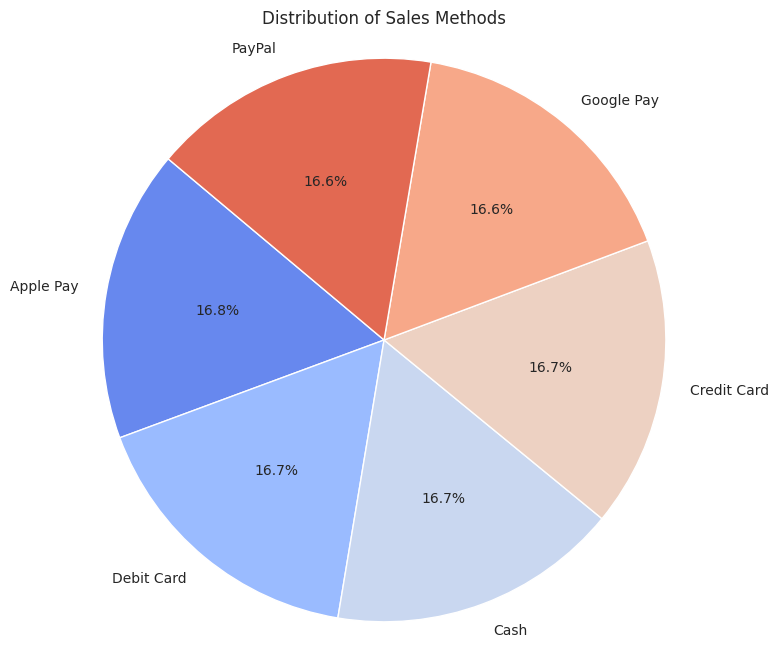

In [29]:
# Menghitung nilai count dari setiap Sales Method
count_data = df['Payment_Method'].value_counts()

# Menggunakan palet warna coolwarm dari seaborn
palette = sns.color_palette("coolwarm", len(count_data))

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(count_data, labels=count_data.index, autopct='%1.1f%%', startangle=140, colors=palette)
plt.title('Distribution of Sales Methods')
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

<ipython-input-30-ae55b3c1f8d5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x="Payment_Method", data = df, order=count_data.index, palette=color_mapping)


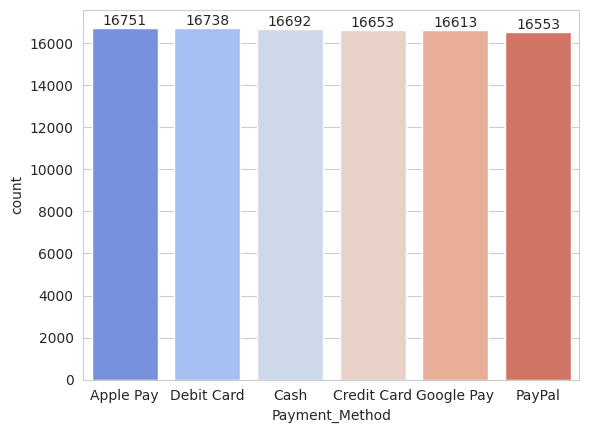

In [30]:
# Menghitung nilai count dari setiap payment method
count_data = df['Payment_Method'].value_counts()
palette = sns.color_palette("coolwarm", len(count_data))
color_mapping = {retailer: color for retailer, color in zip(count_data.index, palette)}

graph = sns.countplot(x="Payment_Method", data = df, order=count_data.index, palette=color_mapping)
for container in graph.containers:
    graph.bar_label(container)
plt.show()

# **PROJECT IS STILL IN PROGRESS**